# Homework 

* Create derived statistic for slap and backhand shots
* Note, the analysis can be extended beyond the wrist shot model example
* Assess and report the derived statistics across relevant factors

In [37]:
%matplotlib inline
import os
import sys
import numpy 
import pandas 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# !pip install plotly

# imports regression library
# OLS: ordinary least squares (estimation technique used to estimate the linear regression model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# Set some Pandas options
pandas.set_option('display.notebook_repr_html', True)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 50)

from decimal import getcontext, Decimal
# Set the precision.
getcontext().prec = 2

In [38]:
dm = pandas.read_csv('shots.csv')
dm = dm[(dm['advantagetypeshooter']=='EV')] 
dm = dm[dm['zone']=="O"]

In [39]:
pandas.crosstab(dm['shotType'], dm['eventtype'], margins=True)

eventtype,GOAL,SHOT,All
shotType,,,
Backhand,513,4709,5222
Deflected,172,701,873
Slap,545,10716,11261
Snap,681,7574,8255
Tip-In,432,1927,2359
Wrap-around,49,897,946
Wrist,2286,25984,28270
All,4678,52508,57186


Create Variables

In [40]:
dm['isgoal'] = dm['eventtype']=='Slap'
dm['XNormAdj'] = 99 - dm['XNorm']
dm.groupby(['eventtype'])[['XNormAdj', 'YNorm']].describe()

XNormAdj         YNorm
eventtype                                  
GOAL      count   4678.000000   4678.000000
          mean      28.037409     -0.132535
          std       13.088705     12.242820
          min        2.000000    -39.000000
          25%       18.000000     -6.000000
          50%       24.000000      0.000000
          75%       35.000000      6.000000
          max       72.000000     40.000000
SHOT      count  52508.000000  52508.000000
          mean      37.724861     -0.398358
          std       16.811628     19.822985
          min        0.000000    -42.000000
          25%       22.000000    -16.000000
          50%       36.000000     -1.000000
          75%       51.000000     15.000000
          max       73.000000     42.000000

In [41]:
dm['XNormAdj'] = dm['XNormAdj'] + 1
dm['YNormAdj'] = numpy.absolute(dm['YNorm'])
dm['YNormAdj'] = dm['YNormAdj'] + 1

dm['lnX'] = numpy.log(dm['XNormAdj'])
dm['lnY'] = numpy.log(dm['YNormAdj'])

dm['dscore'] = dm['tgoals'] - dm['ogoals']
dm['oteamcode'] = dm.apply(lambda x: 1 if (x['teamcode'] == x['hteamcode']) else x['vteamcode'], axis=1)

Create specific data set for Slapshots

In [42]:
dw = dm[dm['shotType']=='Slap']

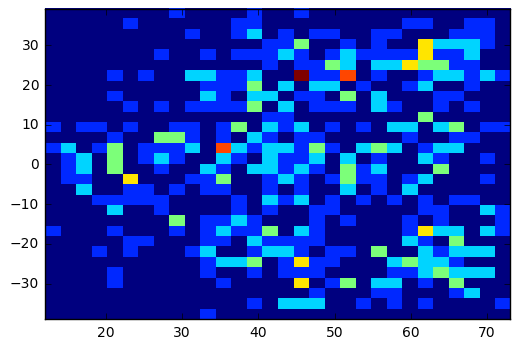

In [43]:
dg = dw[dw['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

In [44]:
m1 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnX'])).fit()
print m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoalx'] = m1.predict()
dw.plot(kind='scatter',x='XNormAdj', y='pgoalx')

PerfectSeparationError: Perfect separation detected, results not available

Backhand Statistical Analysis

In [45]:
dm['isgoal'] = dm['eventtype']=='Backhand'
dm['XNormAdj'] = 99 - dm['XNorm']
dm.groupby(['eventtype'])[['XNormAdj', 'YNorm']].describe()

XNormAdj         YNorm
eventtype                                  
GOAL      count   4678.000000   4678.000000
          mean      28.037409     -0.132535
          std       13.088705     12.242820
          min        2.000000    -39.000000
          25%       18.000000     -6.000000
          50%       24.000000      0.000000
          75%       35.000000      6.000000
          max       72.000000     40.000000
SHOT      count  52508.000000  52508.000000
          mean      37.724861     -0.398358
          std       16.811628     19.822985
          min        0.000000    -42.000000
          25%       22.000000    -16.000000
          50%       36.000000     -1.000000
          75%       51.000000     15.000000
          max       73.000000     42.000000

In [46]:
dw = dm[dm['shotType']=='Backhand']

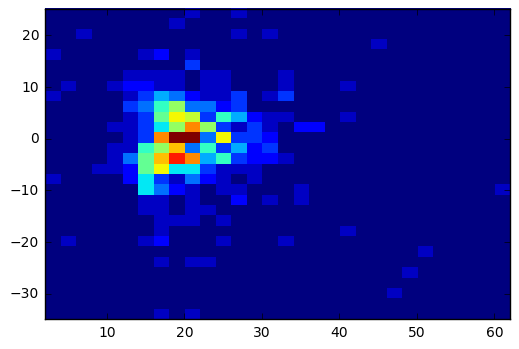

In [47]:
dg = dw[dw['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

In [ ]:
m1 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnX'])).fit()
print m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoalx'] = m1.predict()
dw.plot(kind='scatter',x='XNormAdj', y='pgoalx')

In [ ]:
m2 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnY'])).fit()
print m2.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoaly'] = m2.predict()
dw.plot(kind='scatter', x='YNormAdj', y='pgoaly')